#Ejemplo Regresion Lineal

##1)Importar librerias

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns

##2)Traer el datasets 

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/MarathonData.csv")
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


###Conociendo la cantidad de datos y columnas del dataset

In [6]:
df.shape

(87, 10)

###Imprimir la informacion del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


##Convertir a numeros los datos del dataset

*   Convertimos a valor numerico toda la columna Wall21




In [35]:
df['Wall21'] = pd.to_numeric(df['Wall21'],errors='coerce')

In [28]:
#Hace unas estadisticas generales entre los campos numericos 
df.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0713a62d0>,
      dtype=object)

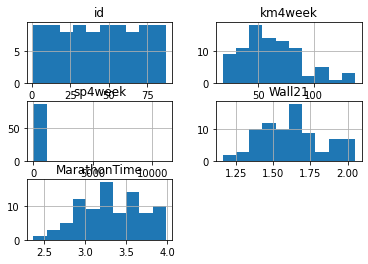

In [29]:
#Crear histograma de los datos numericos de cada campo
df.hist()

##Seleccionar los datos mas relevantes

In [44]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Marathon'])
df = df.drop(columns=['CATEGORY'])
df


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


##Verificar si hay datos nulos

In [45]:
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
dtype: int64

##Rellenamos los datos nulos con 0

In [46]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


##Eliminar registros

In [47]:
df = df.dropna(how='any')
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


##Identificar cuantos valores diferentes hay en cada columna que sea un string

In [48]:
df['CrossTraining'].unique()


array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [52]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

###Asignamos el valor que le vamos a dar para cada tipo de variable

In [ ]:
valores_cross = {"CrossTraining" : {'ciclista 1h':1, 'ciclista 4h':2, 'ciclista 13h':3, 'ciclista 3h':4,'ciclista 5h' :5}}
valores_category = {"Category":{'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5, 'WAM':6}}
df.replace(valores_cross,inplace=True)
df.replace(valores_category,inplace=True)
df

In [54]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,4,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


##Creando la matriz de correlacion

In [ ]:
marathon = pd.DataFrame(df)
marathon.head(10)   #imprimimos las primeras 10 filas

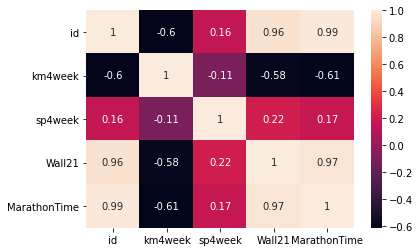

In [23]:

#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = marathon.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

##Graficando la correlacion entre MaratonTime vs km4week

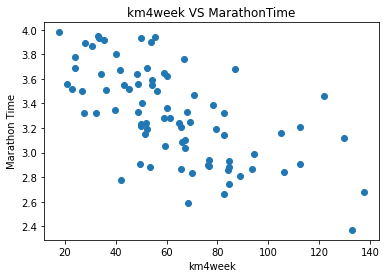

In [55]:
import matplotlib.pyplot as plt
plt.scatter(x = df['km4week'],y= df['MarathonTime'])
plt.title('km4week VS MarathonTime')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

##Graficando MarathonTime vs sp4week(mayor a 2000)

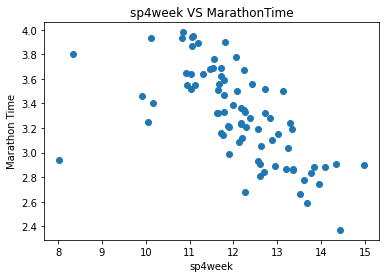

In [56]:
df = df.query('sp4week<2000')
plt.scatter(x = df['sp4week'],y= df['MarathonTime'])
plt.title('sp4week VS MarathonTime')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

##Graficando MarathonTime vs Wall21

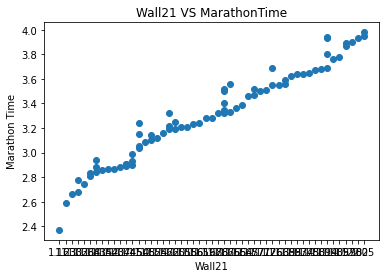

In [58]:
plt.scatter(x = df['Wall21'],y= df['MarathonTime'])
plt.title('Wall21 VS MarathonTime')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

##Iniciando el entrenamiento

In [81]:
#Tomamos el 80% de los datos
datos_entrenamiento = df.sample(frac=0.8,random_state=5)
datos_test = df.drop(datos_entrenamiento.index)
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
42,1,82.7,11.647887,0,1.78,3.32
26,6,129.6,12.188088,0,1.54,3.12
10,1,93.5,13.200000,0,1.42,2.87
63,1,20.7,12.420000,5,1.69,3.56
67,1,34.3,11.307692,0,1.74,3.64
...,...,...,...,...,...,...
61,1,54.1,11.116438,0,1.63,3.55
18,1,84.5,12.549505,0,1.45,2.93
86,3,17.9,10.848485,5,2.05,3.98
22,3,59.4,12.638298,0,1.50,3.05


##Separamos las variables

In [82]:
etiquetas_entrenamiento =datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [83]:
etiquetas_entrenamiento

42    3.32
26    3.12
10    2.87
63    3.56
67    3.64
      ... 
61    3.55
18    2.93
86    3.98
22    3.05
20    2.99
Name: MarathonTime, Length: 64, dtype: float64

##Se inicia el entrenamiento

In [84]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Realizando predicciones

In [85]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.87670432, 2.8588173 , 2.95051596, 2.85436565, 3.10679711,
       3.22711872, 3.35691258, 3.32405789, 3.53175601, 3.74575003,
       3.82034401, 3.64189139, 3.96496254, 3.96617644, 3.86333458,
       4.08355655])

In [86]:
#Buscamos el error porcentual

import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test,predicciones))
print("Error porcentual: %f"%(error*100))

Error porcentual: 8.017342
